<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 2
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Aban 27th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [5]:
# Set your student number
student_number = 98105879
Name = 'Ali'
Last_Name = 'Abbasi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Aban 27th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 7th 23:59:59.

In [94]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30 Points + 5 Extra Points)

<font size=4>
Author: Reza Amini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [7]:
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt

<div>
	<font size=3>
        <hr/>
            In this part of the question, we want to implement the functions and draw diagrams and discuss about the convexity of functions
           <hr/>
    </font>
</div>

## Functions

a)
$f_1(x) = \frac{x^2 cos(\frac{x}{10}) - x}{100} \quad $ where $\quad x \in [80, 110]$
<br/>
b)
$f_2(x) = \log (\sqrt{sin \frac{x}{20}}) \quad $ where $\quad x \in [1, 60]$
<br/>
c)
$f_3(x) = \log (\cos(x) + \frac{45}{x}) \quad $ where $\quad x \in [1, 45]$

<div>
    <font size=3>
In the first step, implement the functions.
     </font>
</div>

In [8]:
def f_1(x):
    return (x * x * np.cos(x / 10) - x) / 100

In [9]:
def f_2(x):
    return np.log10(np.sqrt(np.sin(x / 20)))

In [10]:
def f_3(x):
    return np.log10(np.cos(x) + 45 / x)

<div>
    <font size=3>
    Now implement a function to plot the mathematical functions
     </font>
</div>

In [11]:
def draw(func, x_range):
    plt.plot(x_range, func(x_range))
    plt.show()

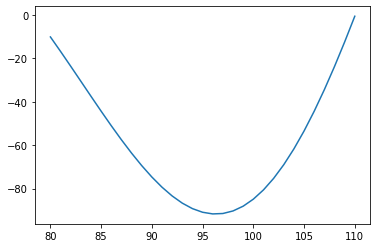

In [12]:
draw(f_1, np.arange(80, 110 + 1))

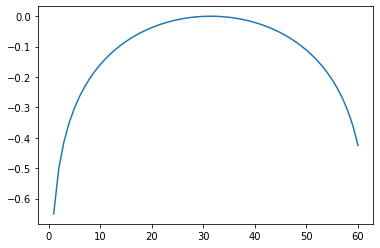

In [13]:
draw(f_2, np.arange(1, 60 + 1))

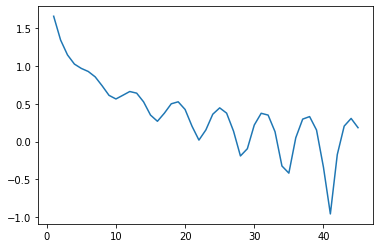

In [14]:
draw(f_3, np.arange(1, 45 + 1))

<div>
    <font size=3>
    Discuss the Convexity of each function according to the diagrams
     </font>
</div>

<font color=blue>
   If we examine them just by looking, we could tell that in those specified ranges, f_1 is convex and has a global minimum and f_2 is concave and has a global maximum and f_3 is neither convex nor concave.
</font>

<div>
    <font size=3>
what method do you suggest to find the maximum in the second function?
     </font>
</div>

(Sorry! I couldn't make it blue.) </br>
Note that log and sqrt are both strictly increasing functions. So finding maximum (or equivalently, optimum) point for $\log{(\sqrt{f(x)})}$ is the same as finding maximum for $f(x)$. Hence we only need to find maximum of $\sin(\frac{x}{20})$ in this range: $\frac{x}{20} = \frac{\pi}{2} \rightarrow x = 10\pi\approx31.4$ <br/>
But if you mean using a computer algorithm to find the maximum, gradient decsent would do nicely. Because this $f_2$ is cocave in the specified range (but we should find minimum of $-f_2$ using gradient descent).

<div>
    <font size=3>
        <hr/>
        <ul>
            In this part, we want to obtain a minimum of one of the above functions with the gradiant descent algorithm
        </ul>  
        <hr/>
    </font>
</div>

## Gradiant descent

<div>
    <font size=3>
    Complete gradiant descent function and calculate the minimum of function (a).
     </font>
</div>

In [15]:
def gradiant_descent(func, initial_point: float, learning_rate: float, max_iterations: int):
    h = learning_rate / 20
    x = initial_point
    for i in range(max_iterations):
        derivative = (func(x + h) - func(x)) / h  # we use this approximation for derivative of func
        if derivative == 0:
            break
        x = x - learning_rate * derivative
    return x

In [16]:
gradiant_descent(
    func=f_1, 
    initial_point=np.random.uniform(80, 110), 
    learning_rate=0.05, 
    max_iterations=1000
)

96.30469621954934

<div>
    <font size=3>
In the last part, we want to investigate the effect of the learning rate hyperparameter on the gradiant descent algorithm with a new function     
    </font>
</div>

## Function

$f(x_1, x_2) = 2x_1^2 + 3x_2^2 - 4x_1x_2 - 50x + 6y$

In [17]:
def f(x_1, x_2):
    return 2 * x_1 * x_1 + 3 * x_2 * x_2 - 4 * x_1 * x_2 - 50 * x_1 + 6 * x_2

<div>
    <font size=3>
Implement gradiant descent function for two-dimensional functions, in such a way that it gives sequence of x_1 and x_2 in the output ()
    </font>
</div>

In [18]:
def gradiant_descent(func, initial_point: Tuple, learning_rate: float, threshold: float, max_iterations: int):
    x_1_sequence = [initial_point[0]]
    x_2_sequence = [initial_point[1]]
    x, y = initial_point
    for i in range(max_iterations):
        x, y = update_points(func, x, y, learning_rate)
        if x > threshold or y > threshold:
            break
        x_1_sequence.append(x)
        x_2_sequence.append(y)
    
    return x_1_sequence, x_2_sequence

def update_points(func, x_1, x_2, learning_rate):
    h = learning_rate / 20
    return x_1 - learning_rate * (func(x_1 + h, x_2) - func(x_1, x_2)) / h, x_2 - learning_rate * (func(x_1, x_2 + h) - func(x_1, x_2)) / h

In [19]:
def draw_points_sequence(func, x_1_sequence, x_2_sequence):
    X1, X2 = np.meshgrid(np.linspace(-100.0, 100.0, 100), np.linspace(-100.0, 100.0, 100))
    Y = func(X1, X2)
    cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X1, X2, Y, )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.scatter(x_1_sequence, x_2_sequence, s=10, c="y")
    plt.show()

<div>
    <font size=3>
    Run the gradiant descent algorithm for each of the learning rate values and use the above function to draw diagram
    </font>
</div>

In [20]:
initial_point = (-100, 100)
learning_rates = [0.01, 0.05, 0.19, 0.4]
threshold = 100
max_iterations = 1000

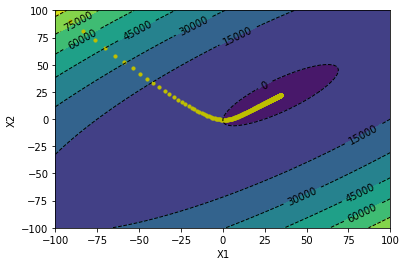

In [21]:
result_sequences = []
for rate in learning_rates:
    result_sequences.append(gradiant_descent(f, initial_point, rate, threshold, max_iterations))

# learning rate 0.01
res1 = result_sequences[0]
draw_points_sequence(f, res1[0], res1[1])

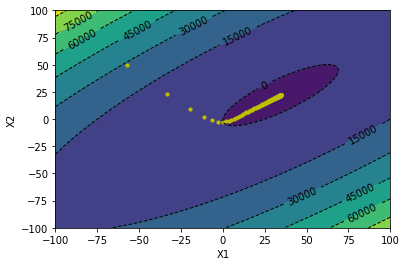

In [22]:
# learning rate 0.05
res2 = result_sequences[1]
draw_points_sequence(f, res2[0], res2[1])

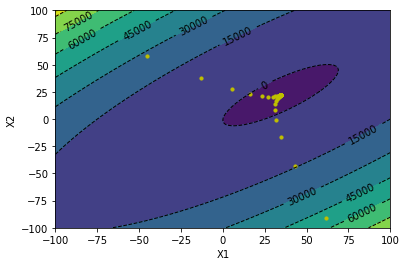

In [23]:
# learning rate 0.19
res3 = result_sequences[2]
draw_points_sequence(f, res3[0], res3[1])

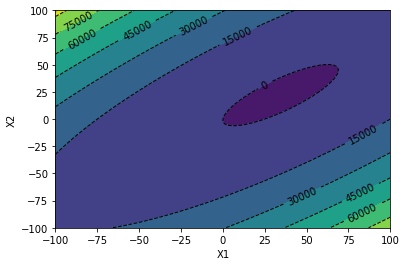

([-100], [100])


In [24]:
# learning rate 0.4
res4 = result_sequences[3]
draw_points_sequence(f, res4[0], res4[1])
print(res4)

<div>
    <font size=3>
    explain your result comprehensively from the charts, 
    </font>
</div>

<font color=blue>
As we see in the above images, with learning rates 0.01, 0.05, 0.19 we evetually converge to global minimum; Note that f is a convex function (with positive semi definite Hessian matrix) and has a global minimum. Convergence to minimum with learning rates 0.01, 0.05 is much smoother than 0.19. With learning rate = 0.19, in every step it jumps over the minimum point; But in every step it gets closer to global minimum and finally it converges. </br>
Using this algorithm with learning rate = 0.4, doesn't converge to any point and in first step, x or y gets higher than threshold and algorithm stops. So 0.4 is too large as learning rate for algorithm to converge. And among these numbers, 0.05 is best choice: it's not too small to make convergence slow and not too large to make it unconverge or converge in zig-zag moves (zig-zag moves can progress very slowly and make gradient descent algorithm too slow)
</font>

# Q2. CSPs (30 Points)

<font size=4>
     Author: Alireza Tajmirriahi
     <br/>
     <font color=red>
     Please run all the cells.
     </font>
</font>
<br/>

As students are preparing for midterm exams and the virtual exam days are gone and forgotten, each department is struggling to select at least one hall out of $N$ halls in the university to hold their exams. But here's the thing:
  - Students from each department aren't really fond of sitting next to students from other departments and must be separated (for example CE students and CS students must not share the same hall for exams).
  - Each department likes certain halls and won't hold their exams in other halls.
  - Sadly, the exit doors in some of the halls are stuck and the hard working staff have provided some routes so that the students from specific halls need to walk through the other hall and exit after the examination. And because they would like to prevent cheating as much as possible, students in such halls cannot be from the same department.
Check out the example below to fully understand the situation.

## Example
Look at this picture carefully.<br>
<img src="Images/CSP_example.png" width="400"/>
  - There are $6$ halls and $3$ departments.
  - The halls which the deparments like are indicated (for example, CE exams can be held only at Hall 1, 4 and 6).
  - Students from Hall 1 should exit using the doors in Hall 2 (Note: they all exit there and won't continue to Hall 3). In this case, EE students cannot be in both Hall 1 and 2 (But of course, it's okay for them to be in Hall 1 and 3).

## Note
  - You _must_ implement and use AC-3 algorithm.
  - You will _probably_ need to utilize the heuristic algorithms you have learned (e.g. MRV and LCV) or consider nearly tree-structured graphs approach in order to pass all tests in an appropriate time.

## Input
  - The first line consists of $N$ (count of halls) and $M$ (count of departments).
  - In the following $M$ lines, the $i$ th line ($1 \le i \le M$) is a list of preferred halls for the $i$ th department (separated by space).
  - In the next line, $E$, the total number of exit constraints (edges in the previous graph) are given.
  - in each of the following $E$ lines, a pair of hall numbers (separated by space) is given (reminder: the direction is important).
$$1 \le N \le 50$$
$$1 \le M \le 50$$

### Sample Input
This sample describes the previous example (CE=1, EE=2, ME=3).
```
6 3
1 4 6
1 2 3 5 6
3 4 5
5
1 2
2 3
3 4
3 5
3 6
```

## Output
In the only line, print:
  - list of one appropriate assignment ordered by hall number (separated by space).
  - `NO` if there isn't.

### Sample Output
One possible solution to the example above is {Hall1=CE, Hall2=EE , Hall3=ME, Hall4=CE, Hall5=EE, Hall6=EE}. So:
```
1 2 3 1 2 2
```
In another example, If Hall3 was not an option for ME, then the answer would be:
```
NO
```
Because then hall 2 or 3 would be empty.

## Your code
**Note:** It's OK to change the signature for the given functions and the given structure is just a suggestion to help you with the implementation. (you can't remove or add any cells based on the **Rules** section)

In [25]:
import numpy as np


# Auxiliary functions
def array_of_list(n):
    arr = np.empty(n, dtype=object)
    for i in range(n):
        arr[i] = []
    return arr


def copy_array_of_list(arr):
    res = np.empty(len(arr), dtype=object)
    for i, e in enumerate(arr):
        res[i] = e.copy()
    return res


def creat_graph(n, edges):
    graph = array_of_list(n)  # todo: list or set?
    for x, y in edges:
        graph[x - 1].append(y - 1)
        graph[y - 1].append(x - 1)  # todo: could it be duplicate?
    return graph


def get_arcs(graph):
    arcs = []
    for node, neighbors in enumerate(graph):
        for neighbor in neighbors:
            arcs.append((node, neighbor))
    return arcs


def create_domains(n, prefrences):
    domains = array_of_list(n)
    for dep, halls in enumerate(prefrences):
        for hall in halls:
            domains[hall - 1].append(dep + 1)
    return domains


def minimum_remaining_values(domains, assignment):
    valid_idx = np.where(assignment == -1)[0]
    tmp = np.vectorize(len)(domains)
    return valid_idx[tmp.argmin()]
    # todo: vectorization
    # todo: tie breaker?


def sorted_least_constraining_values(domains, assignment, graph, var):
    constrained_neighbors = list(
        set(graph[var]).intersection(np.where(assignment == -1)[0]))  # nodes we should check for CONSTRAINT
    constrained_domains = domains[constrained_neighbors]
    return np.argsort([sum(map(lambda x: val in x, constrained_domains)) for val in domains[var]])


def complete_assignment(assignment):
    return -1 not in assignment

In [26]:
def ac_3(arcs, domains, graph):
    while arcs:
        x, y = arcs.pop(0)
        if remove_inconsistent_values(x, y, domains):
            for neighbor in graph[x]:
                if (neighbor, x) not in arcs:
                    arcs.append((neighbor, x))


def remove_inconsistent_values(x, y, domains):  # edge x -> y
    tmp = [a for a in domains[x] if domains[y] != [a]]
    if len(tmp) == len(domains[x]):
        return False
    else:
        domains[x] = tmp
        return True

In [27]:
number_of_halls = None
number_of_deps = None
graph = None
arcs = None


def backtrack(domains, assignment):
    if complete_assignment(assignment):
        return assignment
    ac_3(arcs.copy(), domains, graph)
    var = minimum_remaining_values(domains, assignment)
    vals = sorted_least_constraining_values(domains, assignment, graph, var)
    tmp = domains[var]
    for val_arg in vals:
        val = domains[var][val_arg]
        assignment[var] = val
        domains[var] = [val]
        result = backtrack(copy_array_of_list(domains), assignment)
        domains[var] = tmp
        if result != 'NO':
            return result
    assignment[var] = -1
    return 'NO'


def backtracking_search(domains, n, m, adj_list):
    global number_of_halls
    number_of_halls = n
    global number_of_deps
    number_of_deps = m
    global graph
    graph = adj_list
    global arcs
    arcs = get_arcs(graph)
    return backtrack(domains, -np.ones(n, dtype=int))

In [28]:
import Helper_codes.question2 as q2
import time

TIME_LIMIT = 3

tests = q2.get_all_tests(prefix='q2_')
tests_passed = 0
for test in tests:
    n, m, m_next_lines, e, next_e_lines = q2.scan_test_input(test)
    domains = create_domains(n, m_next_lines)  # domains of halls
    adj_list = creat_graph(n, next_e_lines)
    start_time = time.time()
    result = backtracking_search(domains, n, m, adj_list)
    total_time = time.time() - start_time
    if q2.is_result_valid(test, result) and total_time < TIME_LIMIT:
        tests_passed += 1
    else:
        print(f'test {test} failed. time elapsed= {total_time}')
print(f'Score = {tests_passed / len(tests) * 100}%')

Score = 100.0%


C:\Users\MR.co\AppData\Local\Temp/ipykernel_196600/2693389568.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if result != 'NO':
e:\University\term 5\Artificial Intelligence\Mini Projects\new MPQ2\MPQ2\practical\Helper_codes\question2.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return ' '.join(map(str, result)) if result != 'NO' and ' ' not in result else result


# Q3 (30+5 Points)

<font size=4>
Author: Matina mehdizadeh
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In [29]:
# place for your custom functions for Q3 here

Consider the given 8*8 board game. There are two players in this game and they try to block each other and limit their valid moves by making walls. Their moves are limited to the 8 cells (or less when they are around the edges) beside them and the walls will start to appear only when a player steps into a random generated yellow cell and the wall will continue to be built until the player reaches the next yellow cell. The players start the game at (0,0) and (7,7) and they keep playing untill one of them loses. There are multiple ways for a player to win the match:
- If a player steps into a wall or out of the board, the player loses the match and "invalid move" massege will appear on terminal.
- If the players reach the maximum moves the game finishes and the winner would be chosen based on the maximum valid move they have left plus the number of walls they have made and "No more moves" massege will appear on terminal.
- If the getMove() function does not return any value after 2 seconds, the player loses the match and "Time limit exceeded" massege will appear on terminal.
<img src="Images/Q3.png" style="float: center; margin-left: 250px; margin-top: 50px; width:500px;height:400px;"/>

In this question, the codes for starting the game were provided for you in Helper-codes folder. You are expected to implement the MinimaxPlayer class (which inherit the Player class) with alpha-beta pruning. (25 points)

## Libraries

In [30]:
import numpy as np
import random
from Helper_codes.graphics import *
from Helper_codes.question3 import Cell
from Helper_codes.question3 import IntPair
from Helper_codes.question3 import Player
from Helper_codes.question3 import NaivePlayer
from Helper_codes.question3 import Board
from Helper_codes.question3 import Game
import time
import matplotlib.pyplot as plt

**The following implementations are suggestional and you may change them if you desire.
The move_ functions' purpose is to find out if a player, has a valid move on that direction.
the purpose of checkRow and CheckCole are to check if the player's x and y is still in the board.**


In [87]:
# to do
class MinimaxPlayer(Player):
    start_time = None
    depth = 5

    def __init__(self, col, x, y):
        super().__init__(col, x, y)

    @staticmethod
    def canMove(player, board):
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == j == 0:
                    continue
                if MinimaxPlayer.can_move_to(player, board, i, j):
                    return True
        return False

    def get_other_player(self, board):
        t1, t2 = board.players
        if t1.getCol() == self.getCol():
            return t2
        else:
            return t1

    def random_move(self, moves):
        if moves:
            return random.choice(moves)
        else:
            return None

    @staticmethod
    def get_priority_moves(player, board, moves):
        empty_cells = []
        yellow_cells = []
        for i, j in moves:
            if board.getSize() > player.getX() + i >= 0 and 0 <= player.getY() + j < board.getSize():
                cell = board.getCell(player.getX() + i, player.getY() + j)
                col = cell.getColor()
                if cell.getId() != -1:
                    yellow_cells.append((i, j))
                elif col == 0:
                    empty_cells.append((i, j))
        if player.getBuildingBlocks():
            return empty_cells, yellow_cells
        else:
            return yellow_cells, empty_cells

    @staticmethod
    def return_value(score, place, return_dest):
        return place if return_dest else score

    @staticmethod
    def can_move_to(player, board, i, j):
        return board.getSize() > player.getX() + i >= 0 and 0 <= player.getY() + j < board.getSize() and board.getCell(player.getX() + i, player.getY() + j).getColor() in [0, 3]

    def minValue(self, board, alpha, beta, depth):
        p2 = self.get_other_player(board)
        # if depth == 0 or not MinimaxPlayer.canMove(p2, board) or board.getNumberOfMoves() == board.maxNumberOfMoves:
        if depth == 0:
            return board.getScore(self.getCol())
        v = np.inf
        moves = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        random.shuffle(moves)
        for i, j in moves:
            if MinimaxPlayer.can_move_to(p2, board, i, j):
                new_board = Board(board)
                new_board.players = board.players
                new_board.move(IntPair(p2.getX() + i, p2.getY() + j), p2.getCol())
                v = min(v, self.maxValue(new_board, alpha, beta, depth - 1))
                if v <= alpha:
                    return v
                beta = min(beta, v)
        # if v == np.inf:
        #     return board.getScore(self.getCol())
        # else:
        return v

    def maxValue(self, board, alpha, beta, depth, dest = False):
        # if depth == 0 or not MinimaxPlayer.canMove(self, board) or board.getNumberOfMoves() == board.maxNumberOfMoves:
        if depth == 0:
            return MinimaxPlayer.return_value(board.getScore(self.getCol()), (self.getX(), self.getY()), dest)
        v = -np.inf
        best_move = (self.getX(), self.getY())
        moves = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        random.shuffle(moves)
        moves1, moves2 = MinimaxPlayer.get_priority_moves(self, board, moves)
        for i, j in moves1 + moves2:
            if self.can_move_to(self, board, i, j):
                new_board = Board(board)
                new_board.move(IntPair(self.getX() + i, self.getY() + j), self.getCol())
                val = self.minValue(new_board, alpha, beta, depth - 1)
                if val > v:
                    v = val
                    best_move = (self.getX() + i, self.getY() + j)
                if v >= beta:
                    return MinimaxPlayer.return_value(v, best_move, dest)
                alpha = max(alpha, v)
        # if v == -np.inf:
        #     return MinimaxPlayer.return_value(board.getScore(self.getCol()), (self.getX(), self.getY()), dest)
        # else:
        return MinimaxPlayer.return_value(v, best_move, dest)

    def getMove(self, board):
        alpha = float('-inf')
        beta = float('inf')
        next = IntPair(-20, -20)

        if (board.getNumberOfMoves() == board.maxNumberOfMoves):
            return IntPair(-20, -20)

        if not (MinimaxPlayer.canMove(self, board)):
            return IntPair(-10, -10)

        MinimaxPlayer.start_time = time.time()

        x, y = self.maxValue(board, -np.inf, np.inf, MinimaxPlayer.depth, True)
        return IntPair(x, y)

If you run the game once (numberOfMatches = 1) the game window will open and you would be able to observe the players behaviour and the reason why the winner has won, will appear on terminal.
If you run the game for more than one match (numberOfMatches > 1) the graphic window and the comments on terminal would not show up. This is for the time you finish implementing the MinimaxPlayer class and you want to verify the functionality of your code; also, for next part of the question, in which you should plot the scores for the first player.

In [78]:
################################################################
# p1 must be replace with minimaxPlayer                        #
################################################################
p1 = MinimaxPlayer(1, 0, 0)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 1
MinimaxPlayer.depth = 4
score1, score2 = g.start(numberOfMatches)
print(score1/numberOfMatches)

Player 2 has made an invalid move
Player 1 has won

1.0


In this section, you need to run the game code multiple times and each time with the same numberOfMatches (this should be a large number so your answer be more reliable) once for Naive player and once for Minimax. compare these two plots in terms of shape and the main elements of the distribution. (5 points)

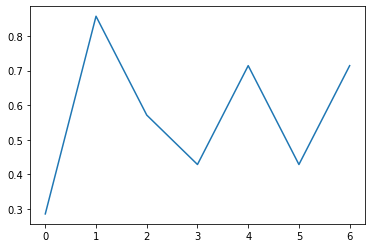

In [58]:
################################################################
# when player1 is NaivePlayer (2.5 point)                      #
################################################################
scores = []
for i in range(7):
    p1 = NaivePlayer(1, 0, 0)
    p2 = NaivePlayer(2, 7, 7)
    g = Game(p1, p2)
    numberOfMatches = 7
    score1, score2 = g.start(numberOfMatches)
    scores.append(score1 / numberOfMatches)
plt.plot(scores)

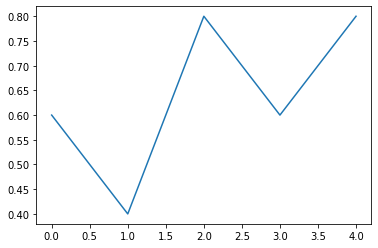

In [88]:
################################################################
# when player1 is MinimaxPlayer (2.5 point)                    #
################################################################
scores = []
for i in range(5):
    p1 = MinimaxPlayer(1, 0, 0)
    p2 = NaivePlayer(2, 7, 7)
    g = Game(p1, p2)
    numberOfMatches = 5
    MinimaxPlayer.depth = 4
    score1, score2 = g.start(numberOfMatches)
    scores.append(score1 / numberOfMatches)
plt.plot(scores)

In this section you should change the game settings for different depths and plot the number of wins in fix number of matches for these depths. Also, you should let two minimax players with diffrent depths play againts eachother and report your observation.(5 points)

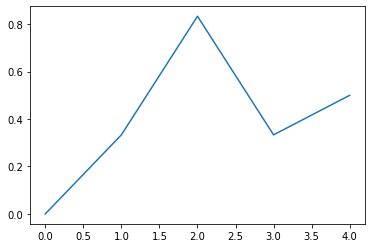

In [91]:
################################################################
# plot the number of wins for diffrent depths (2.5 point)      #
################################################################
scores = []
for i in range(5):
    p1 = MinimaxPlayer(1, 0, 0)
    p2 = NaivePlayer(2, 7, 7)
    g = Game(p1, p2)
    numberOfMatches = 6
    MinimaxPlayer.depth = i
    score1, score2 = g.start(numberOfMatches)
    scores.append(score1 / numberOfMatches)
plt.plot(scores)

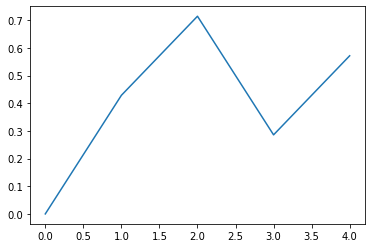

In [92]:
################################################################
# start the match for two minimax players (2.5 point)          #
################################################################
scores = []
for i in range(5):
    p1 = MinimaxPlayer(1, 0, 0)
    p2 = MinimaxPlayer(2, 7, 7)
    g = Game(p1, p2)
    numberOfMatches = 7
    MinimaxPlayer.depth = i
    score1, score2 = g.start(numberOfMatches)
    scores.append(score1 / numberOfMatches)
plt.plot(scores)